 # Проєкт на тему: "Створення моделі машинного навчання для прогнозування митних платежів" 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## I. Попереднє дослідження даних

### Завантаження даних

In [2]:
org_df = pd.read_csv("import_data.csv")
org_df

,date,country,result,hs_code,origin_country,quantity,weight,price,tax
0,202001,BE,B,870323,BE,15.0,22500.0,5196255,1500000
1,202001,BE,B,870323,BE,15.0,12000.0,5196255,1500000
2,202001,BE,B,870390,TG,28.0,42000.0,9264584,3500005
3,202001,BE,B,870390,BJ,28.0,126000.0,6617632,2500020
4,202001,BJ,B,870332,BJ,14.0,16800.0,3970554,1500005
...,...,...,...,...,...,...,...,...,...
303545,202012,ZA,Y,300320,ZA,10.0,10.0,472610,40145
303546,202012,ZA,Y,300490,ZA,10.0,10.0,2939420,249830
303547,202012,ZA,Y,490199,ZA,10.0,120.0,1152710,97950
303548,202012,ZA,Y,851712,ZA,14.0,14.0,637448,109640


### Опрацювання пропущених значень

In [3]:
org_df.isnull().sum()

date               0
country           10
result             0
hs_code            0
origin_country    14
quantity           0
weight             0
price              0
tax                0
dtype: int64

In [4]:
df = org_df.dropna()
df

,date,country,result,hs_code,origin_country,quantity,weight,price,tax
0,202001,BE,B,870323,BE,15.0,22500.0,5196255,1500000
1,202001,BE,B,870323,BE,15.0,12000.0,5196255,1500000
2,202001,BE,B,870390,TG,28.0,42000.0,9264584,3500005
3,202001,BE,B,870390,BJ,28.0,126000.0,6617632,2500020
4,202001,BJ,B,870332,BJ,14.0,16800.0,3970554,1500005
...,...,...,...,...,...,...,...,...,...
303545,202012,ZA,Y,300320,ZA,10.0,10.0,472610,40145
303546,202012,ZA,Y,300490,ZA,10.0,10.0,2939420,249830
303547,202012,ZA,Y,490199,ZA,10.0,120.0,1152710,97950
303548,202012,ZA,Y,851712,ZA,14.0,14.0,637448,109640


In [5]:
df.describe()

,date,hs_code,quantity,weight,price,tax
count,303535.000000,303535.000000,3.035350e+05,3.035350e+05,3.035350e+05,3.035350e+05
mean,202006.922427,677867.085904,5.864369e+05,6.577240e+05,4.706041e+08,7.852749e+07
std,3.500365,252995.527017,2.469876e+07,1.344263e+07,5.365025e+09,1.227927e+09
min,202001.000000,10121.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.050000e+02
25%,202004.000000,420219.000000,1.230000e+02,3.960000e+03,1.307952e+07,7.810325e+06
50%,202007.000000,841430.000000,1.416000e+03,3.311600e+04,4.465440e+07,2.159490e+07
75%,202010.000000,854520.000000,1.700000e+04,1.399680e+05,1.802053e+08,6.105829e+07
max,202012.000000,980100.000000,1.003337e+10,2.764730e+09,1.161503e+12,3.553355e+11


### Опрацювання рядків з нульовими значеннями

In [6]:
df = df[df['quantity'] > 0]
df = df[df['weight'] > 0]
df = df[df['price'] > 0]

In [7]:
df.describe()

,date,hs_code,quantity,weight,price,tax
count,303375.000000,303375.000000,3.033750e+05,3.033750e+05,3.033750e+05,3.033750e+05
mean,202006.921895,677861.555016,5.856675e+05,6.580383e+05,4.703463e+08,7.849684e+07
std,3.500402,253009.475324,2.470176e+07,1.344617e+07,5.363964e+09,1.228101e+09
min,202001.000000,10121.000000,4.400000e-02,4.600000e-02,1.400000e+01,2.050000e+02
25%,202004.000000,420219.000000,1.230000e+02,3.975000e+03,1.310000e+07,7.810275e+06
50%,202007.000000,841430.000000,1.420000e+03,3.315000e+04,4.469080e+07,2.159703e+07
75%,202010.000000,854520.000000,1.700000e+04,1.400000e+05,1.802880e+08,6.105829e+07
max,202012.000000,980100.000000,1.003337e+10,2.764730e+09,1.161503e+12,3.553355e+11


### Виокремлення даних, які містять тільки перевірені зовнішньоекономічні операції

In [8]:
# Якщо result = Z або R, то дана зовнішньоекономічна операція не пройшла формато-логічний контроль і тому такий рядок не слід враховувати для побудови лінійної регресії
res_df = df[df['result'] != 'Z']
res_df = res_df[res_df['result'] != 'R']
res_df

,date,country,result,hs_code,origin_country,quantity,weight,price,tax
0,202001,BE,B,870323,BE,15.0,22500.0,5196255,1500000
1,202001,BE,B,870323,BE,15.0,12000.0,5196255,1500000
2,202001,BE,B,870390,TG,28.0,42000.0,9264584,3500005
3,202001,BE,B,870390,BJ,28.0,126000.0,6617632,2500020
4,202001,BJ,B,870332,BJ,14.0,16800.0,3970554,1500005
...,...,...,...,...,...,...,...,...,...
303545,202012,ZA,Y,300320,ZA,10.0,10.0,472610,40145
303546,202012,ZA,Y,300490,ZA,10.0,10.0,2939420,249830
303547,202012,ZA,Y,490199,ZA,10.0,120.0,1152710,97950
303548,202012,ZA,Y,851712,ZA,14.0,14.0,637448,109640


In [9]:
res_df.groupby('result').size()

result
B     16906
G      4487
Y    169112
dtype: int64

### Розрахунок та візуалізація податкового навантаження

In [10]:
# tax_rate = tax / price
res_df = res_df.assign(tax_rate = res_df['tax'] / (res_df['price']))
res_df.describe()

,date,hs_code,quantity,weight,price,tax,tax_rate
count,190505.000000,190505.000000,1.905050e+05,1.905050e+05,1.905050e+05,1.905050e+05,190505.000000
mean,202007.067793,641662.588814,7.654983e+05,9.003044e+05,6.202419e+08,9.441982e+07,30.189400
std,3.359632,262631.149859,1.963187e+07,1.659644e+07,6.250054e+09,1.366492e+09,3543.992881
min,202001.000000,10121.000000,6.656000e-02,6.860000e-02,1.400000e+01,1.115000e+03,0.000020
25%,202004.000000,392350.000000,1.730000e+02,1.960000e+03,1.435705e+07,5.436655e+06,0.119159
50%,202007.000000,732690.000000,2.430000e+03,2.250000e+04,6.015685e+07,2.636507e+07,0.250159
75%,202010.000000,851190.000000,2.669000e+04,1.400000e+05,2.535108e+08,8.014537e+07,0.803427
max,202012.000000,980100.000000,3.918060e+09,2.764730e+09,1.161503e+12,3.553355e+11,681322.549020


<Axes: xlabel='tax_rate'>

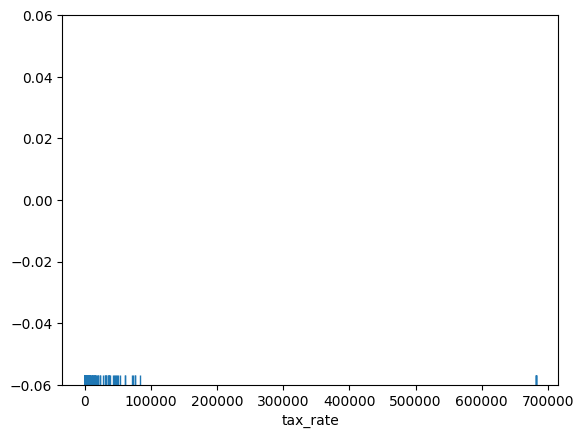

In [11]:
sns.rugplot(res_df['tax_rate'])

**Значення tax_rate, що дорівнює 1, означає, що податкове навантаження становить 100%. Доцільно видалити елементи зі ставкою оподаткування понад 85%.**

In [12]:
# видалення елементів зі ставкою оподаткування понад 85%
res_df = res_df[res_df['tax_rate'] <= 0.85]
res_df

,date,country,result,hs_code,origin_country,quantity,weight,price,tax,tax_rate
0,202001,BE,B,870323,BE,15.0,22500.0,5196255,1500000,0.288669
1,202001,BE,B,870323,BE,15.0,12000.0,5196255,1500000,0.288669
2,202001,BE,B,870390,TG,28.0,42000.0,9264584,3500005,0.377783
3,202001,BE,B,870390,BJ,28.0,126000.0,6617632,2500020,0.377782
4,202001,BJ,B,870332,BJ,14.0,16800.0,3970554,1500005,0.377782
...,...,...,...,...,...,...,...,...,...,...
303545,202012,ZA,Y,300320,ZA,10.0,10.0,472610,40145,0.084943
303546,202012,ZA,Y,300490,ZA,10.0,10.0,2939420,249830,0.084993
303547,202012,ZA,Y,490199,ZA,10.0,120.0,1152710,97950,0.084974
303548,202012,ZA,Y,851712,ZA,14.0,14.0,637448,109640,0.171998


### Дослідження кореляційних зв'язків

In [13]:
numeric_df = res_df[['quantity', 'weight', 'price', 'tax']]
numeric_df.head()

,quantity,weight,price,tax
0,15.0,22500.0,5196255,1500000
1,15.0,12000.0,5196255,1500000
2,28.0,42000.0,9264584,3500005
3,28.0,126000.0,6617632,2500020
4,14.0,16800.0,3970554,1500005


<Axes: >

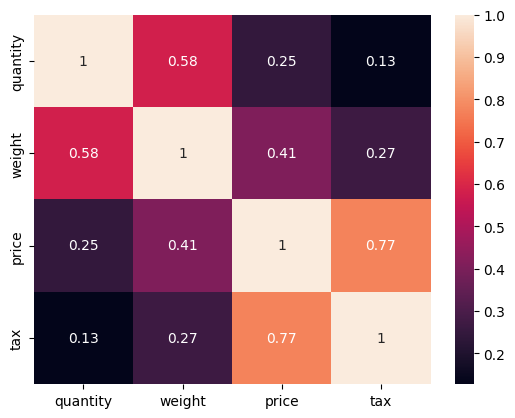

In [14]:
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)

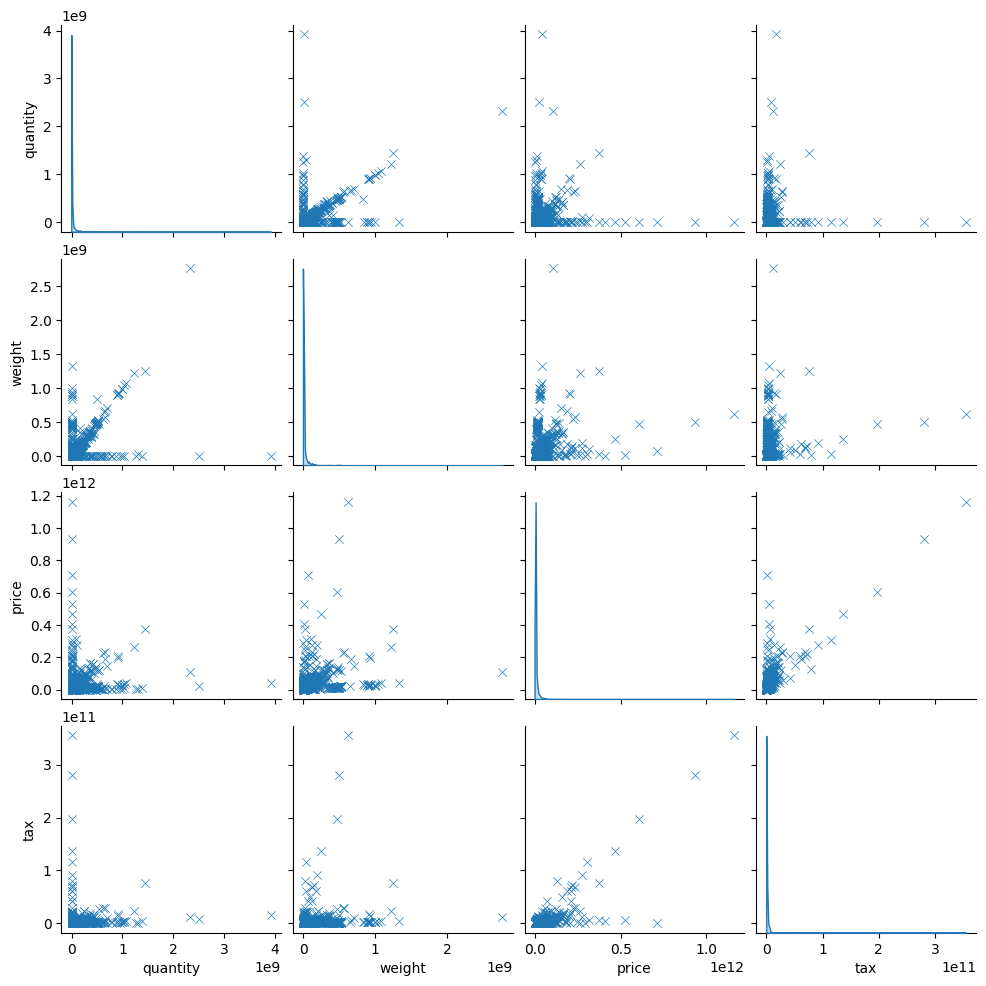

In [14]:
sns.pairplot(numeric_df, markers='x', diag_kind="kde")

**Таким чином, на графіках парної кореляції прослідковується тенденція, за якої податкові надходження зменшуються, навіть за умови зростання цін.**

### Перевірка нормальності розподілу даних

array([[<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'tax'}>]], dtype=object)

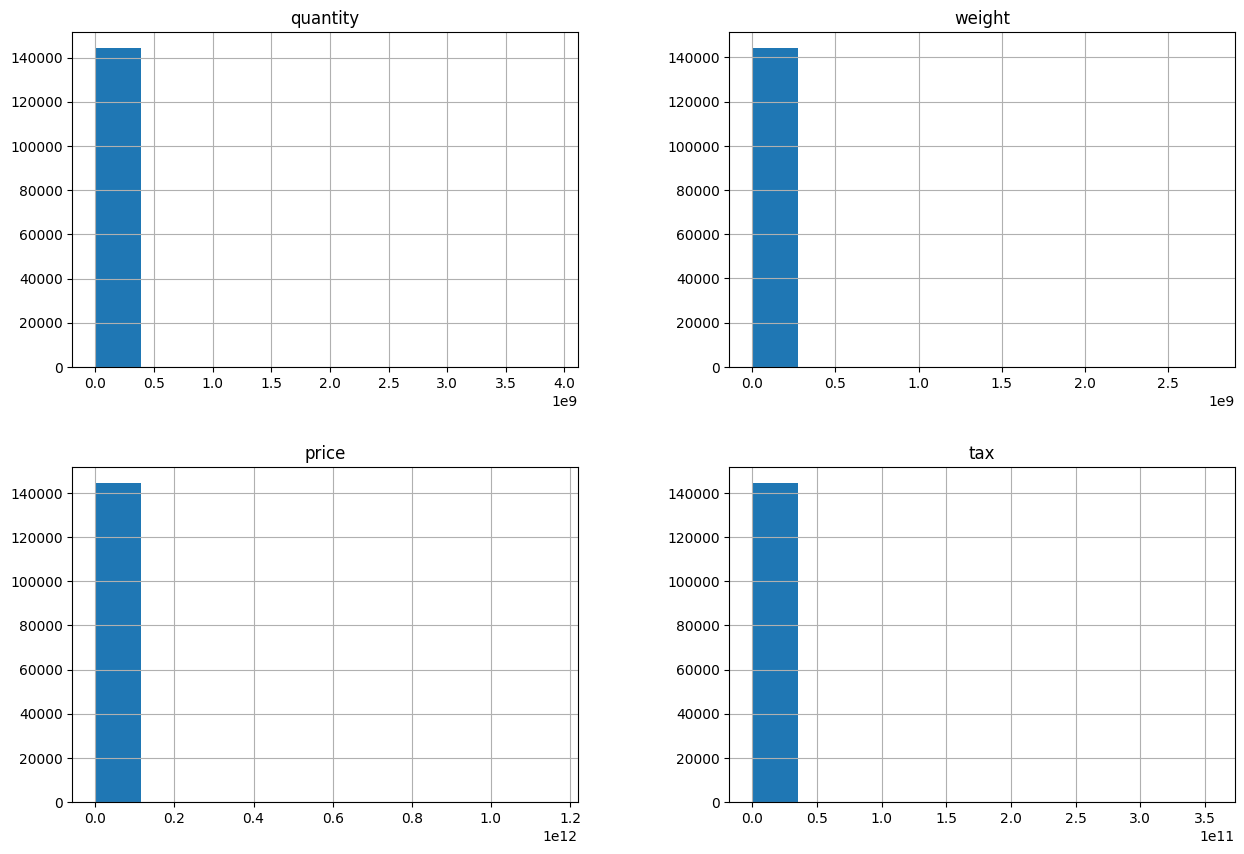

In [15]:
numeric_df.hist(figsize=(15, 10))

array([[<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'tax'}>]], dtype=object)

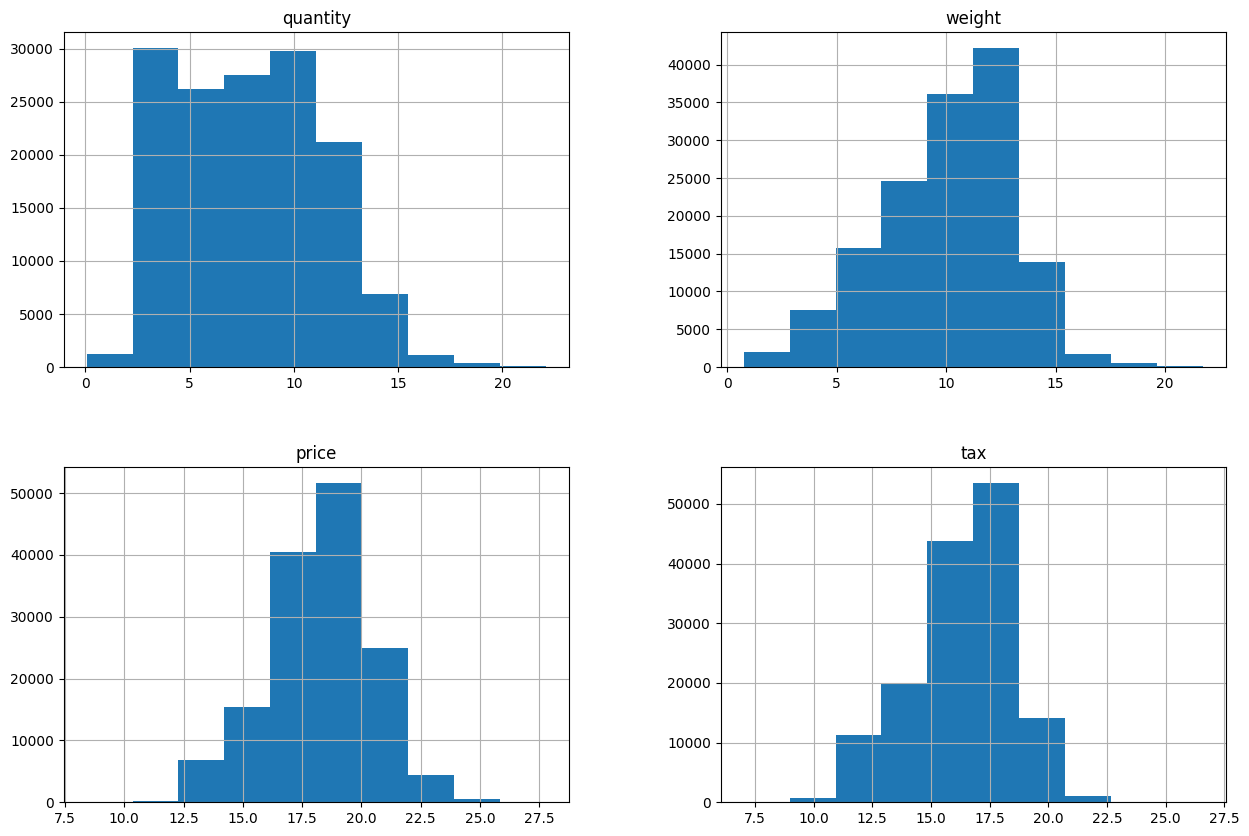

In [16]:
# застосуємо перетворення даних, використавши функцію log() попередньо додавши 1 до всіх значень
numeric_log_df = np.log(numeric_df + 1)
numeric_log_df.hist(figsize=(15,10))

In [17]:
numeric_log_df.describe()

,quantity,weight,price,tax
count,144367.000000,144367.000000,144367.000000,144367.000000
mean,7.883693,10.070301,18.293632,16.356177
std,3.510566,3.013968,2.178844,2.119642
min,0.064439,0.751416,8.410721,7.017506
25%,4.909008,7.913082,16.974280,15.068277
50%,7.901377,10.573903,18.458429,16.661506
75%,10.562625,12.267078,19.773265,17.910285
max,22.088862,21.740209,27.780736,26.596328


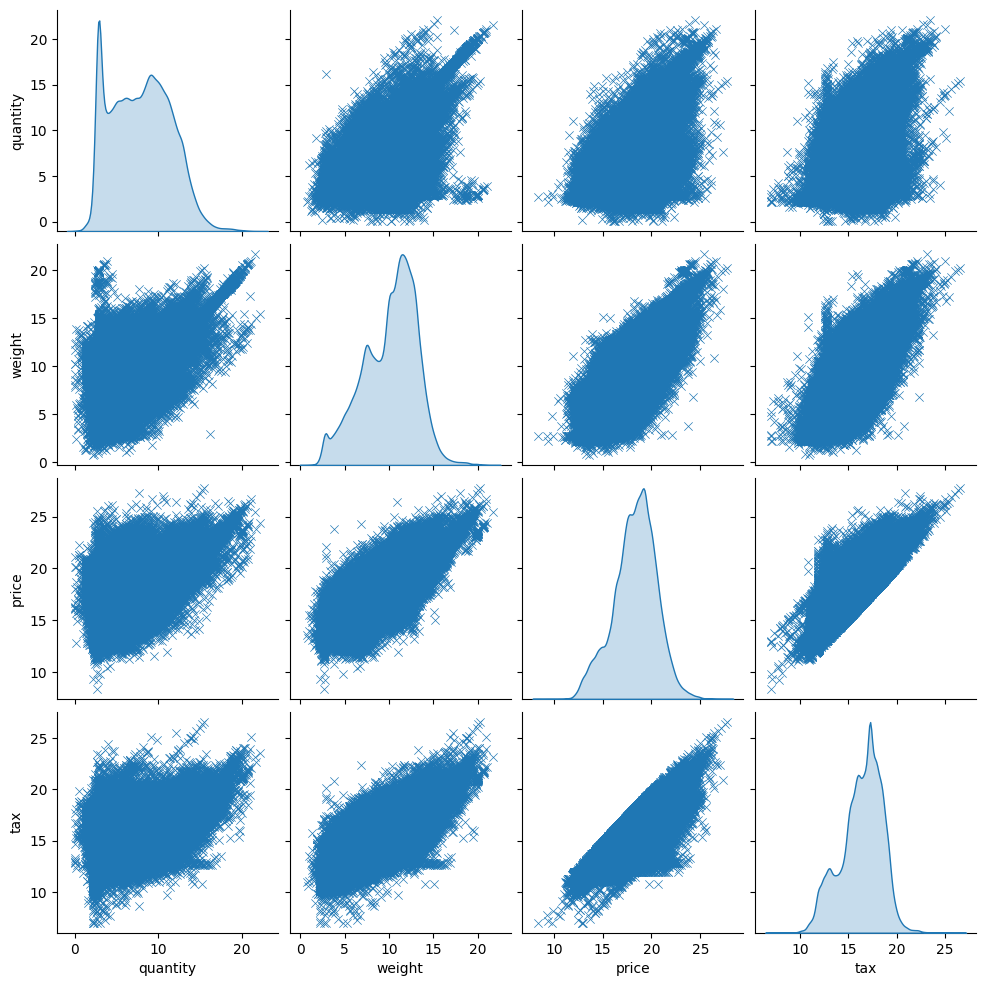

In [18]:
sns.pairplot(numeric_log_df, markers='x', diag_kind="kde")

<Axes: >

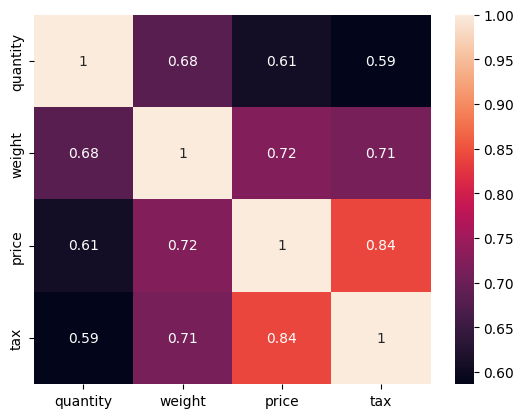

In [19]:
corr = numeric_log_df.corr()
sns.heatmap(corr, annot=True)

**Змінна "price" зберігає сильний лінійний зв’язок зі змінною "tax", а також кореляція між змінними "quantity" та "weight" збільшилася після застосування логарифмічного перетворення**

Застосуємо метод MinMax Scaler, який використовує мінімальне та максимальне значення атрибута для повернення значень даних у значення діапазону від 0 до 1. MinMax Scaler віднімає мінімальне значення функції та повертає його, поділивши на різницю між максимальним і мінімальним значенням.

In [20]:
scaler = MinMaxScaler()

scaler.fit(numeric_log_df)
scaled = scaler.transform(numeric_log_df)

numeric_log_df = pd.DataFrame(data = scaled, columns=numeric_log_df.columns)
numeric_log_df

,quantity,weight,price,tax
0,0.122961,0.441659,0.364105,0.367922
1,0.122961,0.411712,0.364105,0.367922
2,0.149963,0.471396,0.393959,0.411198
3,0.149963,0.523738,0.376589,0.394013
4,0.120031,0.427741,0.350216,0.367922
...,...,...,...,...
144362,0.105949,0.078446,0.240336,0.182992
144363,0.105949,0.078446,0.334693,0.276372
144364,0.105949,0.192692,0.286366,0.228549
144365,0.120031,0.093223,0.255782,0.234307


## II. Побудова моделі лінійної регресії та оцінка її точності

## Однофакторна лінійна регресія

In [21]:
X = numeric_log_df[['quantity', 'weight', 'price']]
Y = numeric_log_df['tax']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [22]:
x_train = X_train[['price']]
y_train = Y_train

In [23]:
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

In [24]:
print('intercept: ', line_fitter.intercept_)
print('slope: ', line_fitter.coef_)

intercept:  0.06428740180532949
slope:  [0.80876321]


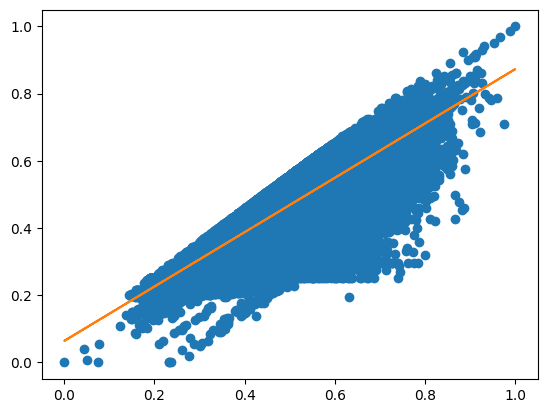

In [25]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, line_fitter.predict(x_train))
plt.show()

In [26]:
# коефіцієнт детермінації
line_fitter.score(x_train, y_train)

0.7062106740028196

In [27]:
# показники MAE, MSE, RMSE
mae = mean_absolute_error(y_train, line_fitter.predict(x_train))
mse = mean_squared_error(y_train, line_fitter.predict(x_train))
rmse = np.sqrt(mse)
print('Середня абсолютна похибка:', mae)
print('Середня квадратична похибка:', mse)
print('Корінь середньої квадратичної похибки:', rmse)

Середня абсолютна похибка: 0.04193776047265177
Середня квадратична похибка: 0.003441414736817777
Корінь середньої квадратичної похибки: 0.05866357248597955


## Багатофакторна лінійна регресія

In [28]:
x_test = X_test[['quantity', 'weight', 'price']]
y_test = Y_test

In [29]:
x_train = X_train[['quantity', 'weight', 'price']]
y_train = Y_train

In [30]:
multi_fitter = LinearRegression()
multi_fitter.fit(x_train, y_train) 

LinearRegression()

### Візуалізація фактичних і прогнозних митних платежів на основі тестових даних

Text(0, 0.5, 'Predicted Tax')

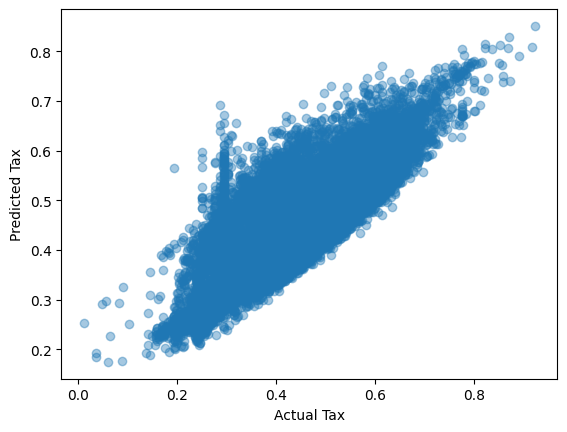

In [31]:
y_predict = multi_fitter.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Tax")
plt.ylabel("Predicted Tax")

In [32]:
# коефіцієнт детермінації
multi_fitter.score(x_test, y_test)

0.7314123043915489

In [33]:
mae = mean_absolute_error(y_test, multi_fitter.predict(x_test))
mse = mean_squared_error(y_test, multi_fitter.predict(x_test))
rmse = np.sqrt(mse)
print('Середня абсолютна похибка:', mae)
print('Середня квадратична похибка:', mse)
print('Корінь середньої квадратичної похибки:', rmse)

Середня абсолютна похибка: 0.039960598828645555
Середня квадратична похибка: 0.003155116977090794
Корінь середньої квадратичної похибки: 0.0561704279589429


### Візуалізація та оцінка "залишків" даних

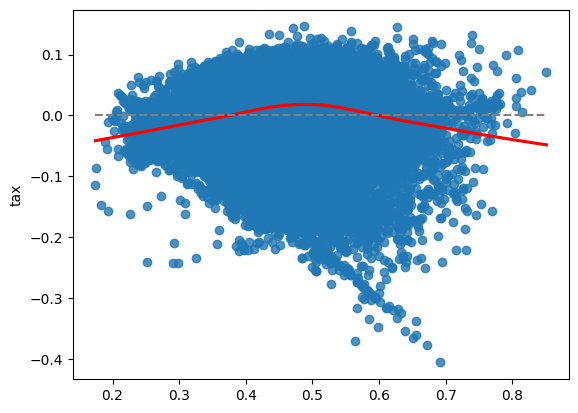

In [34]:
predict = multi_fitter.predict(x_test)
residual = y_test - predict
sns.regplot(x=predict, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([predict.min(), predict.max()], [0, 0], '--', color='grey')

(array([6.0000e+00, 1.8000e+01, 5.9000e+01, 2.5000e+02, 8.1900e+02,
        1.1770e+03, 5.5150e+03, 1.3925e+04, 6.5800e+03, 5.2500e+02]),
 array([-0.40502846, -0.34992834, -0.29482823, -0.23972811, -0.184628  ,
        -0.12952789, -0.07442777, -0.01932766,  0.03577246,  0.09087257,
         0.14597269]),
 <BarContainer object of 10 artists>)

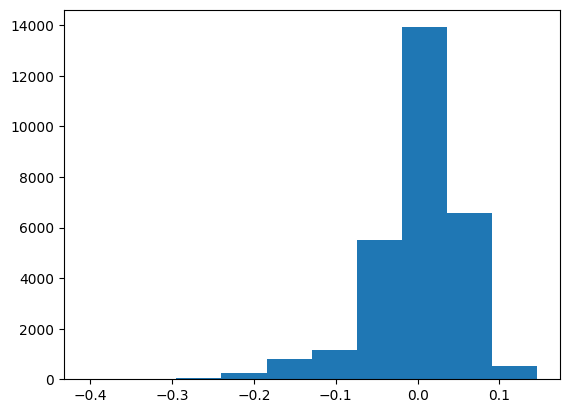

In [35]:
# візуалізація розподілу "залишків" даних
plt.hist(residual)

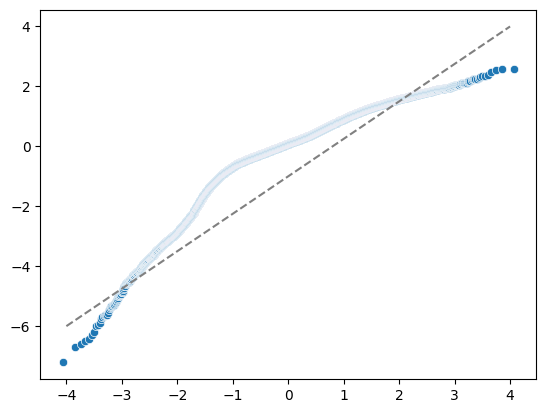

In [36]:
# візуалізація за допомогою Q-Q графіку
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-4, 4], [-6, 4], '--', color='grey')

<Axes: ylabel='tax'>

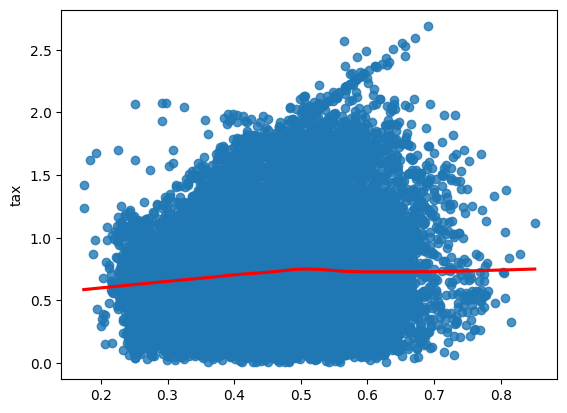

In [37]:
# гомоскедастичність "залишків" даних
sns.regplot(x=predict, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

**Таким чином, побудована модель багатофакторної лінійної регресії показала дещо вищі результати точності у порівнянні із однофакторною. Хоча графік Q-Q показує, що не всі дані розташовані на сірій лінії тренду, відсутні викиди даних, які суттєво відхиляються від тренду. У цілому, метрики моделі показують, що вона логічно пояснює більшу частину варіативності залежної змінної (надходження митних платежів). Проте слід зазначити, що точність прогнозів залежатиме від якості і точності зібраних даних, а також інших факторів, що впливають на залежну змінну, тому важливо регулярно перевіряти та оновлювати модель.**

**Враховуючи зазначене, побудована модель багатофакторної лінійної регресії може бути використана з метою:**
1. Прогнозування індикативних показників надходжень митних платежів до державного бюджету.
2. Здійснення перевірки існуючих підходів до планування надходжень обсягів окремих податків (зокрема, мита, акцизного податку та податку на додану вартість з імпорту товарів на митну територію країни) у міжнародній торгівлі товарами.
3. Співставлення звітних даних митної статистики за результатами адміністрування митних платежів з результатами отриманих прогнозів.